In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
l1 = []
l2 = []
def images(dir):
  a = os.listdir('/content/drive/MyDrive/data/Garbage classification/Garbage classification/'+ dir)
  for c in a:
    l1.append(c)
  b = len(a)
  for i in range(0,b):
    l2.append(dir)


In [5]:
names = os.listdir('/content/drive/MyDrive/data/Garbage classification/Garbage classification')
for name in names[:6]:
  images(name)

In [5]:
len(l1)

2542

In [6]:
len(l2)

2542

In [6]:
df = pd.DataFrame(l1,columns=['Name'])

In [7]:
df['Label'] = l2

In [8]:
df.head()

,Name,Label
0,cardboard242.jpg,cardboard
1,cardboard263.jpg,cardboard
2,cardboard216.jpg,cardboard
3,cardboard159.jpg,cardboard
4,cardboard95.jpg,cardboard


In [16]:
df.to_csv('/content/drive/MyDrive/data/Garbage classification/Garbage classification/df.csv',index=False)

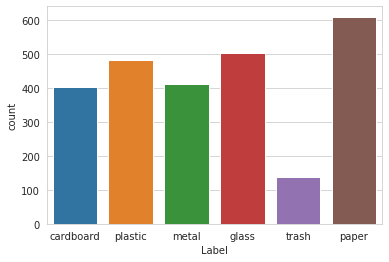

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Label',data=df)


In [9]:
x = df['Name']
y = df['Label']

In [2]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
x_train.head()

350     cardboard124.jpg
2329        paper126.jpg
2218         paper32.jpg
1655         glass29.jpg
2452         paper35.jpg
Name: Name, dtype: object

In [15]:
from matplotlib.image import imread

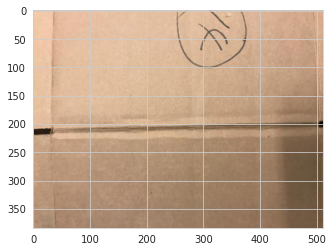

In [16]:
plt.imshow(imread('/content/drive/MyDrive/data/Garbage classification/Garbage classification/cardboard/cardboard1.jpg'))

In [17]:
trainpath = []
for i in x_train:
  if 'cardboard' in i:
    trainpath.append('/content/drive/MyDrive/data/Garbage classification/Garbage classification/cardboard/'+i)
  elif 'glass' in i:
    trainpath.append('/content/drive/MyDrive/data/Garbage classification/Garbage classification/glass/'+i)
  elif 'metal' in i:
    trainpath.append('/content/drive/MyDrive/data/Garbage classification/Garbage classification/metal/'+i)
  elif 'paper' in i:
    trainpath.append('/content/drive/MyDrive/data/Garbage classification/Garbage classification/paper/'+i)
  elif 'plastic' in i:
    trainpath.append('/content/drive/MyDrive/data/Garbage classification/Garbage classification/plastic/'+i)
  else:
    trainpath.append('/content/drive/MyDrive/data/Garbage classification/Garbage classification/trash/'+i)

In [18]:
len(trainpath)

2033

In [19]:
len(x_train)

2033

In [20]:
testpath = []
for i in x_test:
  if 'cardboard' in i:
    testpath.append('/content/drive/MyDrive/data/Garbage classification/Garbage classification/cardboard/'+i)
  elif 'glass' in i:
    testpath.append('/content/drive/MyDrive/data/Garbage classification/Garbage classification/glass/'+i)
  elif 'metal' in i:
    testpath.append('/content/drive/MyDrive/data/Garbage classification/Garbage classification/metal/'+i)
  elif 'paper' in i:
    testpath.append('/content/drive/MyDrive/data/Garbage classification/Garbage classification/paper/'+i)
  elif 'plastic' in i:
    testpath.append('/content/drive/MyDrive/data/Garbage classification/Garbage classification/plastic/'+i)
  else:
    testpath.append('/content/drive/MyDrive/data/Garbage classification/Garbage classification/trash/'+i)

In [21]:
len(x_test) == len(testpath)

True

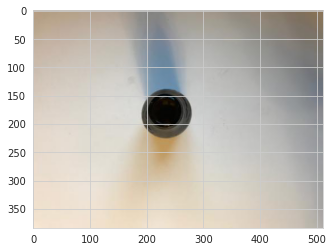

In [22]:
plt.imshow(imread(testpath[250]))

In [28]:
dim1 = []
dim2 = []
for image_file in testpath:
  img = imread(image_file)
  d1,d2,colors = img.shape

  dim1.append(d1)
  dim2.append(d2)

In [29]:
np.mean(dim1)

384.0

In [30]:
np.mean(dim2)

512.0

In [2]:
image_shape = (384,512,3)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
image_gen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,
                               zoom_range=0.1,horizontal_flip=True,fill_mode = 'nearest')

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,GlobalMaxPool2D

In [6]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(256,512,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(256,512,3),activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(256,512,3),activation='relu'))
model.add(MaxPool2D())
model.add(GlobalMaxPool2D())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(6,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 510, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 255, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 255, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 253, 128)     36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 126, 128)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 124, 64)       73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 62, 64)        0

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
model_checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/data/Garbage classification/Garbage classification/model.h5',
                                   monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [37]:
pip install pytest-shutil

In [38]:
import shutil

In [47]:
dst = '/content/drive/MyDrive/data/Garbage classification/train_images/'
for i in trainpath:
  if 'cardboard' in i:
    shutil.copy2(i,dst+'cardboard')
  if 'glass' in i:
    shutil.copy2(i,dst+'glass')
  if 'metal' in i:
    shutil.copy2(i,dst+'metal')
  if 'paper' in i:
    shutil.copy2(i,dst+'paper')
  if 'plastic' in i:
    shutil.copy2(i,dst+'plastic')
  if 'trash' in i:
    shutil.copy2(i,dst+'trash')

In [49]:
dst = '/content/drive/MyDrive/data/Garbage classification/test_images/'
for i in testpath:
  if 'cardboard' in i:
    shutil.copy2(i,dst+'cardboard')
  if 'glass' in i:
    shutil.copy2(i,dst+'glass')
  if 'metal' in i:
    shutil.copy2(i,dst+'metal')
  if 'paper' in i:
    shutil.copy2(i,dst+'paper')
  if 'plastic' in i:
    shutil.copy2(i,dst+'plastic')
  if 'trash' in i:
    shutil.copy2(i,dst+'trash')

In [9]:
train_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/data/Garbage classification/train_images',
                                                target_size=(256,512),
                                                color_mode='rgb',
                                                batch_size=16)

Found 2033 images belonging to 6 classes.


In [10]:
test_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/data/Garbage classification/test_images',
                                               target_size=(256,512),
                                               batch_size=16,shuffle=False)

Found 509 images belonging to 6 classes.


In [11]:
train_image_gen.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [ ]:
results = model.fit(train_image_gen,epochs=200,validation_data=test_image_gen,batch_size=16,validation_batch_size=16,verbose = 1,callbacks=[model_checkpoint])

Epoch 1/200
128/128 [==============================] - 515s 4s/step - loss: 1.8984 - accuracy: 0.2317 - val_loss: 1.8204 - val_accuracy: 0.2515

Epoch 00001: val_accuracy improved from -inf to 0.25147, saving model to /content/drive/MyDrive/data/Garbage classification/Garbage classification/model.h5
Epoch 2/200
128/128 [==============================] - 92s 716ms/step - loss: 1.6922 - accuracy: 0.3246 - val_loss: 1.6510 - val_accuracy: 0.3635

Epoch 00002: val_accuracy improved from 0.25147 to 0.36346, saving model to /content/drive/MyDrive/data/Garbage classification/Garbage classification/model.h5
Epoch 3/200
128/128 [==============================] - 91s 710ms/step - loss: 1.5630 - accuracy: 0.3733 - val_loss: 2.0514 - val_accuracy: 0.2554

Epoch 00003: val_accuracy did not improve from 0.36346
Epoch 4/200
128/128 [==============================] - 90s 704ms/step - loss: 1.5465 - accuracy: 0.3930 - val_loss: 1.7769 - val_accuracy: 0.2652

Epoch 00004: val_accuracy did not improve fr